In [1]:
## 필요한 library
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision',4)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20.5f}'.format) ## get rid of scientific notation

plt.style.use('seaborn')

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

wage = sm.datasets.get_rdataset("Wage",package="ISLR") ## dataset 없이도 가져옴
wage = wage.data
wage.head() #잘 가져왔는지 확인. 성별 변수 하나가 다르네요

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.31806,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.87506,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04139,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.31806,75.04315


In [3]:
wage.iloc[:, 2:9] = wage.iloc[:, 2:9].apply(pd.Categorical) ## 범주화(변수 개수 하나 차이 나서 10->9로 조정)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
## biase가 True면 새로 생성된 col이 1차부터 들어감
polf = pol.fit_transform(wage.loc[:, 'age'].values.reshape(-1, 1))

## 2~5차항까지 생성
wage['age2'] = polf[:,1]
wage['age3'] = polf[:,2]
wage['age4'] = polf[:,3]
wage['age5'] = polf[:,4]

# 4차항까지를 가지고 wage 예측할 거라서
X = wage.loc[:, ['age', 'age2', 'age3', 'age4']]
y = wage.wage

wage.head()

,year,age,maritl,race,education,region,...,logwage,wage,age2,age3,age4,age5
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,...,4.31806,75.04315,324.00000,5832.00000,104976.00000,1889568.00000
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,...,4.25527,70.47602,576.00000,13824.00000,331776.00000,7962624.00000
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,...,4.87506,130.98218,2025.00000,91125.00000,4100625.00000,184528125.00000
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,...,5.04139,154.68529,1849.00000,79507.00000,3418801.00000,147008443.00000
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,...,4.31806,75.04315,2500.00000,125000.00000,6250000.00000,312500000.00000


In [5]:
model = smf.ols(formula='wage~age + age2 + age3 + age4', data=wage)
model = model.fit()
model.summary() ## 3장에서 사용했었던 코드

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           2.77e-57
Time:                        16:32:14   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age           21.2455      5.887      3.609      0.000       9.703      32.788
age2          -0.5639      0.206     -2.736      0.006      -0.968      -0.160
age3           0.0068      0.003      2.221      0.026       0.001       0.013
age4       -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

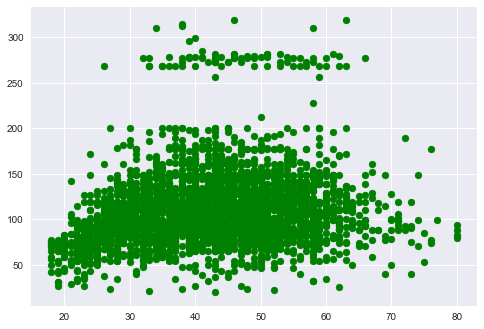

In [6]:
plt.scatter(wage['age'],wage['wage'],color='green')
plt.show()

In [7]:
X = wage.loc[:,['age','age2','age3','age4']] # 1~4차항
Y = wage.wage

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept = True) # 절편도 추정
lin_reg.fit(X,Y)
lin_reg.intercept_,lin_reg.coef_  ## 위에서 sm.ols랑 같은 값!

(-184.15417977415404,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

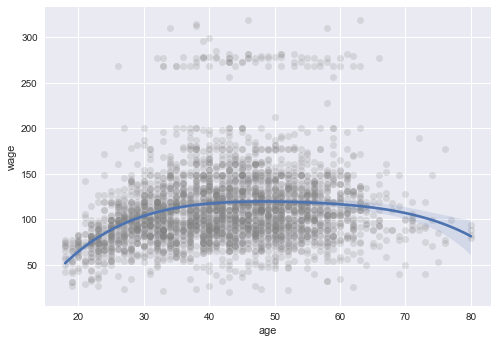

In [9]:
sns.regplot(x='age', y='wage', data=wage, order=4,   
            scatter_kws={'alpha': 0.2, 'color': 'gray', 'facecolor': None});
##facecolor는 배경색, alpha는 투명도, order는 차수

In [10]:
poly_lin= smf.ols(formula='wage ~ age + age2 + age3 + age4 +age5', data=wage).fit()

# ANOVA
anova_sm = sm.stats.anova_lm(poly_lin, typ=1)

anova_sm #age5는 p값이 크고 F statistic도 작은 값 return

,df,sum_sq,mean_sq,F,PR(>F)
age,1.00000,199869.66497,199869.66497,125.44432,0.00000
age2,1.00000,228786.01013,228786.01013,143.59311,0.00000
age3,1.00000,15755.69366,15755.69366,9.88876,0.00168
age4,1.00000,6070.15212,6070.15212,3.80981,0.05105
age5,1.00000,1282.56302,1282.56302,0.80498,0.36968
Residual,2994.00000,4770321.68581,1593.29382,nan,nan


In [11]:
## step function
wage['wage250'] = (wage.wage>250).map({True:1,False:0})
## wage를 250 기준으로 1 / 0 할당

wage.head()

,year,age,maritl,race,education,region,...,wage,age2,age3,age4,age5,wage250
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,...,75.04315,324.00000,5832.00000,104976.00000,1889568.00000,0
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,...,70.47602,576.00000,13824.00000,331776.00000,7962624.00000,0
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,...,130.98218,2025.00000,91125.00000,4100625.00000,184528125.00000,0
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,...,154.68529,1849.00000,79507.00000,3418801.00000,147008443.00000,0
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,...,75.04315,2500.00000,125000.00000,6250000.00000,312500000.00000,0


In [12]:
## wage250을 종속변수로 하는 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, C=1e9)
#0에 가까울수록 Regularization 강화하는 parameter(C가 클수록 overfitting가능성)

log_reg.fit(X,wage.wage250) ## log_reg.summary() 안 통함

log_reg.intercept_,log_reg.coef_

(array([-5.6498841e-05]),
 array([[-1.12834480e-03, -1.60767970e-02,  5.10936262e-04,
         -4.28423077e-06]]))

In [13]:
from statsmodels.formula.api import glm
# 종속변수가 정규분포 아닌 경우 포함하는 일반화선형모델 Generalized Linear Model(GLM)

lr_sm = glm(formula='wage250 ~ age + age2 + age3 + age4',
           data=wage,
           family= sm.families.Binomial(sm.families.links.logit)).fit()
## 여기서 0 또는 1 이니까 Binomial (종속변수의 분포)
## 그 밖에도 gaussian, poisson 등등 다양함(참고)

C:\Users\lg\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


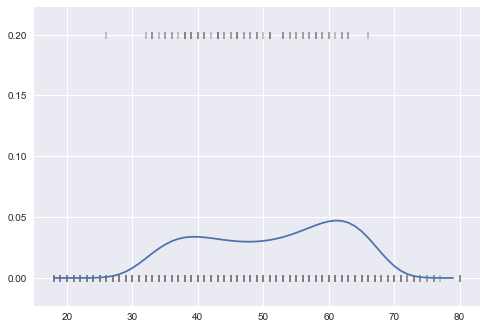

In [14]:
age_grid = np.arange(wage.age.min(),wage.age.max()).reshape(-1,1)
#flatten range of 'age' predictor

x_test = pd.DataFrame(PolynomialFeatures(4,include_bias=True).fit_transform(age_grid),
                     columns=['Intercept','age','age2','age3','age4'])

logit_pred = lr_sm.predict(x_test)

plt.scatter(wage.age,wage.wage250/5,marker='|',color='gray',alpha=0.5)
## 각 점 표시(marker) 투명도 alpha, 5로 나눠서 y축에 0.2

plt.plot(age_grid,logit_pred) ;##로지스틱 회귀 결과

In [15]:
age_step, bins = pd.cut(wage.age,4,retbins=True,right=True)
bins
## 연속형을 구간별 범주화.(4개 구간)
## right = True : [a,b] False: [a,b)
## retbins = True : bin 얻음

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [16]:
wage_step = pd.concat([wage.age,age_step,wage.wage,wage.wage250],
                      keys=['age','age_step','wage','wage250'],
                      axis=1) ## 두 번째 축 방향으로 concat


In [17]:
wage_step

,age,age_step,wage,wage250
231655,18,"(17.938, 33.5]",75.04315,0
86582,24,"(17.938, 33.5]",70.47602,0
161300,45,"(33.5, 49.0]",130.98218,0
155159,43,"(33.5, 49.0]",154.68529,0
11443,50,"(49.0, 64.5]",75.04315,0
...,...,...,...,...
376816,44,"(33.5, 49.0]",154.68529,0
302281,30,"(17.938, 33.5]",99.68946,0
10033,27,"(17.938, 33.5]",66.22941,0
14375,27,"(17.938, 33.5]",87.98103,0


In [18]:
X=pd.get_dummies(wage_step.age_step) ## 더미 변수화
X=X.drop(X.columns[0],axis=1)

## 첫 번째 col drop. 가변수 만들 때 n개면 n-1개의 범주로 가능하니까. 3장의 혈액형 예시!
## pd.get_dummies 할 때 인수로 drop_first = True 해도 된다고 알고 있어요. By default, drop_first = False

y = wage_step.wage

lr_step = LinearRegression(fit_intercept=True)

lr_step.fit(X,y)
lr_step.intercept_,lr_step.coef_

(94.158392033519, array([24.05349138, 23.664559  ,  7.6405917 ]))

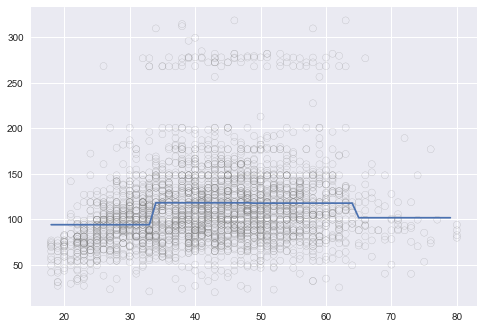

In [19]:
age_grid_bins = np.digitize(age_grid.ravel(),bins)
# 아까 구했던 bin, digitize: 구간을 나눠 mapping 시킴.
## ravel() : 1차원 변환

X_test = pd.get_dummies(age_grid_bins).drop(1,axis=1) ## 범주화 하고 drop하는 거 한번에!

lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age,wage.wage,marker='o',color='gray',alpha=0.5,facecolor='None')
plt.plot(age_grid,lin_pred)

C:\Users\lg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


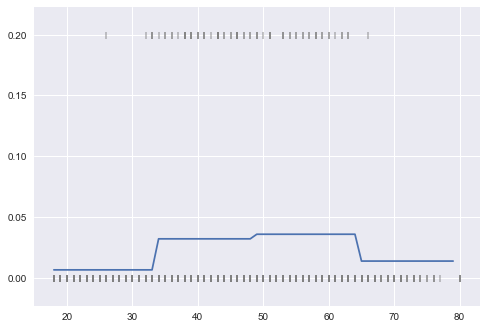

In [20]:
## 참고 코드에서 알려준대로 안되어서 sm.GLM으로 했습니다

lr_sm = sm.GLM(wage_step.wage250, sm.add_constant(X),
            family=sm.families.Binomial(sm.families.links.logit)).fit()

log_pred = lr_sm.predict(sm.add_constant(X_test))

plt.scatter(wage_step.age, wage_step.wage250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_pred);

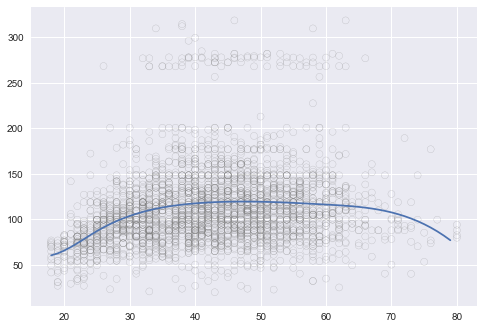

In [21]:
## splines

from patsy import dmatrix

age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')
## 3차원 -> cubic spline

age_grid_spline1 = dmatrix('bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1, wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred1);

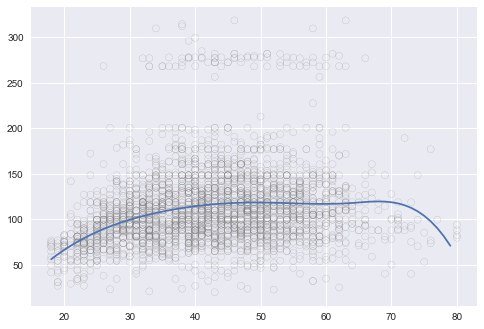

In [22]:
## 앞에서는 knot 지정, 여기서는 df 지정

age_spline2 = dmatrix('bs(age, df=6, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline2 = dmatrix('bs(age_grid, df=6, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg2 = LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2, wage.wage)

spline_pred2 = spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred2);

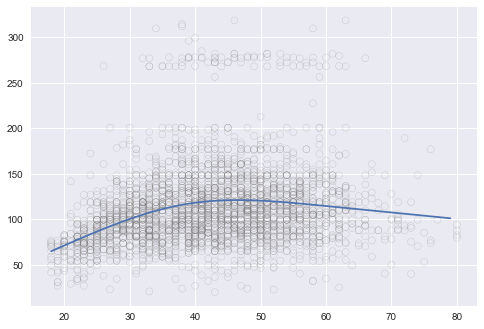

In [23]:
# natural spline ; 인수에서 bs가 cr으로 바뀐 것

age_spline3 = dmatrix('cr(age, df=4)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age_grid, df=4)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg3 = LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3, wage.wage)

spline_pred3 = spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred3);

In [24]:
## GAM

year_spl = dmatrix('cr(year, df=4)',
                   data=wage,
                   return_type='dataframe').drop('Intercept', axis=1) ## 절편 drop

age_spl = dmatrix('cr(age, df=5)',
                  data=wage,
                  return_type='dataframe').drop('Intercept', axis=1)

edu_gam = pd.get_dummies(wage.education).iloc[:, 1:]

## year, age에는 natural spline(cr), education는 더미 변수화(get_dummies)->iloc 써서 drop_first

## GAM는 additive니까 concat으로 묶어서 처리. 두 번째 축에 대해서
wage_gam = pd.concat([wage.wage, year_spl, age_spl, edu_gam], axis=1)

X = wage_gam.iloc[:, 1:14]
y = wage_gam.wage

gam = LinearRegression(fit_intercept=True)
gam.fit(X, y)

gam.intercept_, gam.coef_

(75.40855392027856,
 array([-4.43395136e+00, -3.03043899e-02,  1.58046315e+00,  2.88379259e+00,
        -2.95110484e+01,  8.20753750e+00,  1.70035897e+01,  1.19661833e+01,
        -7.66626210e+00,  1.07857906e+01,  2.31820289e+01,  3.78598409e+01,
         6.23017265e+01]))